In [129]:
import numpy as np
from scipy.integrate import quad
import seaborn as sns

sns.set_palette(sns.color_palette("flare"))
sns.set_style("darkgrid")

p = 0.85
w = 3*np.pi/p

def f(x, w):
    return -2000*np.exp(-(w*x)/2)*np.sin(w*x)

a0 = 2/p*quad(lambda x: f(x, w), 0, p)[0]
q0 = a0/2

a, b, q = [], [], [q0]
num_coeffs = 50
for n in range(1, num_coeffs + 1):
    an = 2/p*quad(lambda x: f(x, w)*np.cos(2*n*np.pi*(x - p/2)/p), 0, p)[0]
    bn = 2/p*quad(lambda x: f(x, w)*np.sin(2*n*np.pi*(x - p/2)/p), 0, p)[0]
    qn = 1/2*(an - 1j*bn)

    a.append(an)
    b.append(bn)
    q.append(qn)

a = np.array(a)
b = np.array(b)

print(q)







[-171.2903234806839, (157.75149763041102-130.55296355620226j), (54.95430640749897+138.83193197683946j), (-50.92415022398715-37.035745617445144j), (30.26595495560038+13.770292302074083j), (-19.486294588598412-6.586916480652948j), (13.521714055874122+3.666905506677653j), (-9.917836330689957-2.254663739588467j), (7.581791713034137+1.4869295290118005j), (-5.983151973617808-1.0330622112722017j), (4.841621968416381+0.7472599822637073j), (-3.9982559898169776-0.5581912116931058j), (3.357584630507781+0.42805859831167564j), (-2.8594888343184315-0.33552482749430185j), (2.464589977461349+0.26790754850434173j), (-2.146222927037886-0.2173390305860403j), (1.885811210754453+0.1787587027720169j), (-1.6700918085500767-0.14880922862810406j), (1.4893903471573473+0.12520269117963706j), (-1.3365158244236504-0.10634290977803385j), (1.206033033616123+0.09109297500173315j), (-1.0937720765818826-0.07862803117915419j), (0.9964906112642262+0.06833966005286371j), (-0.9116367992599593-0.05977236170463203j), (0.8371

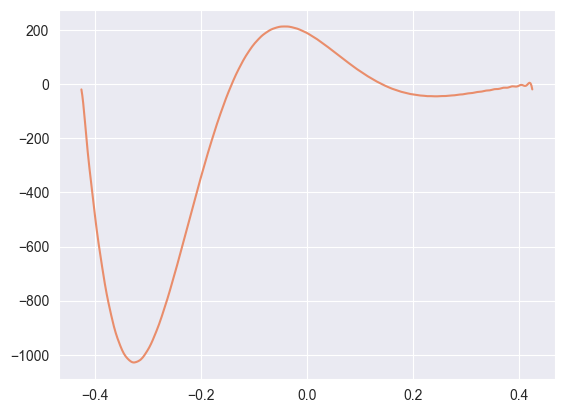

In [130]:
import matplotlib.pyplot as plt
from matplotlib import cm
xsp = np.linspace(-p/2, p/2, 500)
def approxf(x):
    val = a0/2
    for n in range(num_coeffs):
        val += a[n]*np.cos(2*(n + 1)*np.pi*x/p) + b[n]*np.sin(2*(n + 1)*np.pi*x/p)
    return val

plt.plot(xsp, approxf(xsp))

In [99]:
rho = 1
omega0 = 2*np.pi/p
mu = 1
R = 0.0254
nu = mu/rho

In [100]:
def J0(x):
    from math import factorial as fact
    op = 0
    for i in range(10):
        op += ((-1) ** i) * (x **(2 * i))/((fact(i) ** 2) * (4 ** i))
    return op

In [101]:
def lmda(omega) :
    return np.sqrt(omega/(2*nu))*(1+1j)

In [102]:
def u(t, r):
    v = 0
    for n in range(1, num_coeffs + 1):
        v += np.real(q[n]*1j/(rho*n*omega0)*(1 - (J0(1j*lmda(n*omega0)*r))/(J0(1j*lmda(n*omega0)*R)))*np.exp(1j*n*omega0*t))
    return q0/(4*mu)*(r + R)*(r - R) + v
    

In [103]:
def vel(t,r):
    #u_0 = lambda r: q0/(4*mu)*(r - R)*(r + R)
    #u = u_0
    u = 0
    for i in range(1,51):
        u += np.real(q[i]*1j/(rho*i*omega0)*(1 - J0(1j*lmda(i*omega0)*r)/J0(1j*lmda(i*omega0)*R))*np.exp(1j*i*omega0*t))
    return u + q0/(4*mu)*(r - R)*(r + R)

In [2]:
import matplotlib as mpl
cmap = mpl.colormaps['flare']

Nt, Nr = 1000, 1000
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
tt = np.linspace(-p/2,p/2,Nt)
rr = np.linspace(0,R,Nr)
t_list, r_list = np.meshgrid(tt,rr)
u1 = vel(tt[:,None],rr[None,:])
ax.plot_surface(t_list.T, r_list.T, u1, cmap=cmap, linewidth=0)
ax.set_xlabel('t')
ax.set_ylabel('r')
ax.set_zlabel('u')
#ax.yaxis._axinfo["grid"]['linewidth'] = 0.1
plt.show()
#print(u1)
#for k in range(10):
plt.plot(tt,u1[:,0]) #u1[i,j] = v[i*0.85/1000,j]

AttributeError: module 'matplotlib' has no attribute 'colormaps'

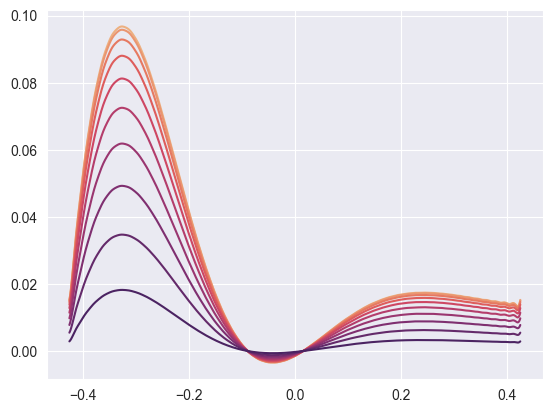

In [140]:
#ax = fig.add_subplot(111)
num_colors = 10
#ax.set_prop_cycle(color=[cmap(1.*i/num_colors) for i in range(num_colors)])
color = cmap(np.linspace(0, 1, num_colors))
for i, c in zip(range(num_colors), color):
    plt.plot(tt,u1[:,i*100], c=c) 

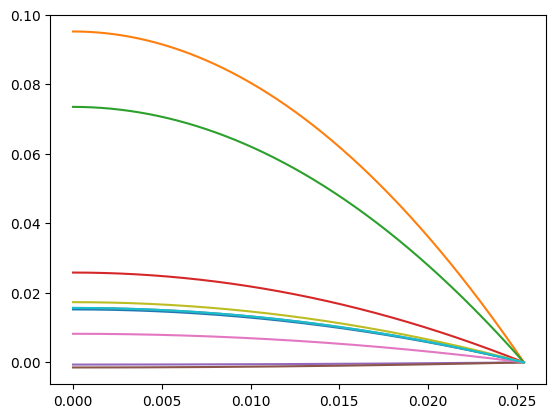

In [106]:
for k in range(10):
    plt.plot(rr,u1[k*100, :]) 